In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh_TGV1')
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [195]:
'Compute trajectories for several ti'
N=50
wtis = np.linspace(-np.pi/2, np.pi/2-0.01, N)
wtau = np.linspace(0, 1.5*2*np.pi, 1000)

trajs = []
for wti in wtis:
    traj = np.cos(wtau+wti) - np.cos(wti) + np.sin(wti)*wtau
    trajs.append(traj)

'Compute ti from tau, then compute the return energy'
phase = np.linspace(0, 2*np.pi, 1000)
phasei = np.arctan((1-np.cos(phase))/(phase-np.sin(phase)))
Ek = 2 * (np.sin(phase+phasei) - np.sin(phasei))**2

C:\Users\tg263331\AppData\Local\Temp\ipykernel_14744\4114896884.py:13: RuntimeWarning: invalid value encountered in divide
  phasei = np.arctan((1-np.cos(phase))/(phase-np.sin(phase)))


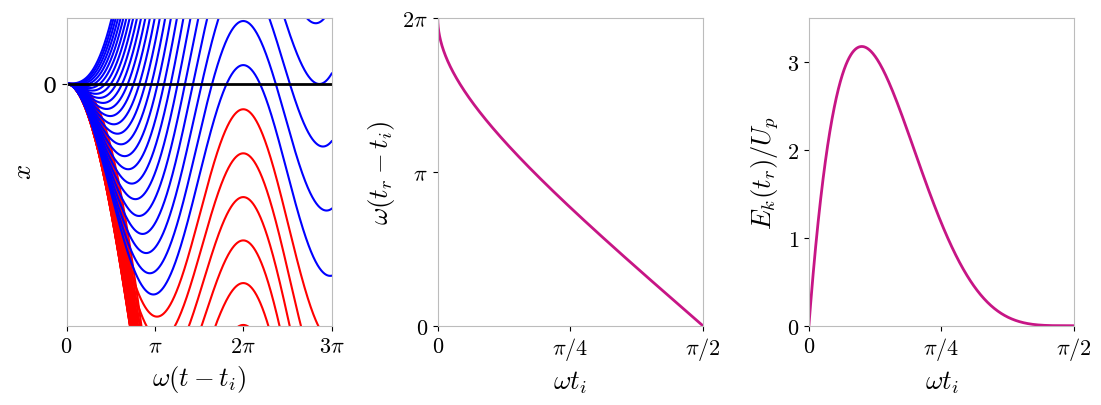

In [201]:
%matplotlib inline
fig, ax = plt.subplots(1, 3, figsize=(13, 4))
fig.subplots_adjust(wspace=0.4)

colors=plt.cm.plasma(np.linspace(0, 1, N))

for i in range(len(trajs)):
    traj=trajs[i]
    if np.sign(np.min(traj[1:])) != np.sign(np.max(traj[1:])):
        ax[0].plot(wtau, traj, linewidth=1.5, color='b')
    else:
        ax[0].plot(wtau, traj, linewidth=1.5, color='r')

ax[0].hlines(0, 0, 3*np.pi, color='k')
ax[0].set_xlim(0, 3*np.pi)
ax[0].set_ylim(-2.2, 0.6)
ax[0].set_xlabel(r'$\omega(t-t_i)$')
ax[0].set_ylabel(r'$x$')
ax[0].set_yticks([0], [0])
ax[0].set_xticks([0, np.pi, 2*np.pi, 3*np.pi], ['$0$', '$\pi$', '$2\pi$', '$3\pi$'])


ax[1].plot(phasei, phase, color='mediumvioletred')

ax[1].set_xlim(0, np.pi/2)
ax[1].set_ylim(0, 2*np.pi)
ax[1].set_xticks([0, np.pi/4, np.pi/2], ['$0$', '$\pi/4$', '$\pi/2$'])
ax[1].set_yticks([0, np.pi, 2*np.pi], ['$0$', '$\pi$', '$2\pi$'])

ax[1].set_xlabel(r'$\omega t_i$')
ax[1].set_ylabel(r'$\omega(t_r-t_i)$')



ax[2].plot(phasei, Ek, color='mediumvioletred')

ax[2].set_xlim(0, np.pi/2)
ax[2].set_ylim(0, 3.5)
ax[2].set_xticks([0, np.pi/4, np.pi/2], ['$0$', '$\pi/4$', '$\pi/2$'])
ax[2].set_yticks([0, 1, 2, 3], ['$0$', '$1$', '$2$', '$3$'])

ax[2].set_xlabel(r'$\omega t_i$')
ax[2].set_ylabel(r'$E_k(t_r)/U_p$')



plt.show()

In [207]:
N=1
wtis = np.linspace(-np.pi/2+0.01, np.pi/4, N)
wt = np.linspace(0, 0.7*2*np.pi, 1000)

ells = [0, 0.25, 0.5, 0.75, 1]

trajs = []
for ell in ells:
    wti = -np.pi/4
    x = np.cos(wt-wti) - np.cos(wti) - np.sin(wti)*wt
    y = ell*( -np.sin(wt-wti) - np.sin(wti) + np.cos(wti)*wt )
    trajs.append([x, y])

    yr = ell/np.sqrt(1+ell**2) * ( -np.sin(phase+phasei) + np.sin(phasei) + np.cos(phasei)*phase)

In [208]:
%matplotlib qt
ax = plt.axes(projection='3d')

for i in range(len(ells)):
    x, y = trajs[i]
    ax.plot3D(y, wt, x)

ax.plot3D([0, 0], [0, 0.7*2*np.pi], [0, 0], color='k')

In [209]:
plt.plot(phasei, yr)